# LES Band Orientation Model Training
---
Full Environmental Database Model

### Carter J. Humphreys
Email: [chumphre@oswego.edu](mailto:chumphre@oswego.edu) | GitHub:[@HumphreysCarter](https://github.com/HumphreysCarter) | Website: [carterhumphreys.com](http://carterhumphreys.com/)

In [179]:
import pickle
import joblib 
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

## Load The Data

In [180]:
# Load dataset
dataPath="../data/full_dataset.csv"
dataset=pd.read_csv(dataPath, header=None)
dataset=dataset.drop([0, 7, 8, 9], axis=1)

## Summarize Dataset

In [181]:
# shape
print(dataset.shape)

(1145, 330)


In [182]:
# head
print(dataset.head(5))

         1          2          3          4          5          6      10   \
0  43.535946 -76.223320  43.353896 -75.329963  43.234745 -74.595901  13.26   
1  43.532036 -76.217194  43.334646 -75.373511  43.143089 -74.490379  13.26   
2  43.521149 -76.232010  43.346326 -75.618544  43.195889 -74.990135  13.26   
3  43.518513 -76.217072  43.339364 -75.832468  43.176296 -75.413177  13.26   
4  43.565903 -76.202736  43.259891 -75.604233  42.989628 -75.002983  13.26   

   11   12   13   ...      324    325    326    327    328      329    330  \
0  0.0  0.0  0.0  ...  2923.61 -13.54  15.11  26.70  -7.37  5401.54 -29.67   
1  0.0  0.0  0.0  ...  2927.03 -14.12  14.21  27.32  -9.45  5399.77 -30.21   
2  0.0  0.0  0.0  ...  2927.59 -14.74  23.99  20.99 -11.98  5396.19 -30.40   
3  0.0  0.0  0.0  ...  2934.41 -15.24  33.86  17.20 -14.21  5399.68 -30.47   
4  0.0  0.0  0.0  ...  2937.42 -15.73  38.57  19.43 -12.18  5401.98 -30.02   

     331    332   333  
0  25.71  38.48 -1.77  
1  25.77  37.4

In [183]:
# descriptions
print(dataset.describe())

               1            2            3            4            5    \
count  1145.000000  1145.000000  1145.000000  1145.000000  1145.000000   
mean     43.630653   -76.381776    43.633758   -75.787178    43.639705   
std       0.233597     0.279259     0.348498     0.408128     0.519221   
min      43.243790   -77.509819    42.907711   -77.060097    42.608696   
25%      43.446945   -76.559319    43.339364   -76.035680    43.210049   
50%      43.617672   -76.225258    43.619020   -75.743159    43.589722   
75%      43.780396   -76.199753    43.901171   -75.471099    44.032555   
max      44.314522   -76.050560    44.518521   -74.867294    44.987915   

               6            10           11           12           13   ...  \
count  1145.000000  1145.000000  1145.000000  1145.000000  1145.000000  ...   
mean    -75.142739     4.608821     4.733284    19.422943    23.082725  ...   
std       0.670774     2.408046     6.983989    23.370011    32.730655  ...   
min     -76.93824

In [184]:
# class distribution
print(dataset.groupby([1, 2]).size())

1          2         
43.243790  -77.509819    1
43.248756  -77.003174    1
43.253349  -77.061295    1
43.254963  -77.477936    1
43.257233  -77.469215    1
                        ..
44.259010  -76.164742    1
44.267601  -76.164268    1
44.309586  -76.296242    1
44.310493  -76.092506    1
44.314522  -76.264351    1
Length: 1102, dtype: int64


## Data Visualization

In [185]:
# box and whisker plots
#dataset.plot(figsize=(5,20), kind='box', subplots=True, layout=(3,107), sharex=False, sharey=False)
#pyplot.show()

In [186]:
# histograms
#dataset.hist(figsize=(5,20))
#pyplot.show()

In [187]:
# scatter plot matrix
#scatter_matrix(dataset, figsize=(5,20))
#pyplot.show()

## Algorithms

In [188]:
# Split-out validation dataset
array = dataset.values
X = array[:,6:331]
y = array[:,0:6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
print(y)
print(X)

[[ 43.535946   -76.22332     43.35389555 -75.329963    43.234745
  -74.595901  ]
 [ 43.532036   -76.217194    43.33464587 -75.37351127  43.143089
  -74.490379  ]
 [ 43.521149   -76.23201     43.34632558 -75.61854384  43.195889
  -74.990135  ]
 ...
 [ 43.553471   -76.185211    43.228888   -75.63504386  42.98103
  -75.192307  ]
 [ 43.320927   -76.710991    43.121541   -76.32067063  42.869659
  -75.870171  ]
 [ 43.384274   -76.656464    43.12864013 -76.4084122   42.85833
  -75.925262  ]]
[[13.26  0.    0.   ... 25.71 38.48 -1.77]
 [13.26  0.    0.   ... 25.77 37.47 -3.5 ]
 [13.26  0.    0.   ... 24.93 37.17 -5.82]
 ...
 [ 2.23  4.63 19.43 ... 12.6  34.36  4.09]
 [ 2.23  4.63 19.43 ... 14.08 36.31 -0.16]
 [ 2.23  4.63 19.43 ... 17.43 38.78 -4.31]]


In [189]:
# Spot Check Algorithms
models = []
models.append(('MultiLR', LinearRegression()))
models.append(('KNN(n=2)', KNeighborsRegressor(n_neighbors=2)))
models.append(('KNN(n=5)', KNeighborsRegressor(n_neighbors=5)))
#models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
#models.append(('MLPR', MLPRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    if name != 'MultiLR': # Hide MultiLR since data is skewed 
        results.append(cv_results)
        names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

MultiLR: 0.538179 (0.033450)
KNN(n=2): 0.753748 (0.031187)
KNN(n=5): 0.683063 (0.033112)
RandomForest: 0.668335 (0.025824)


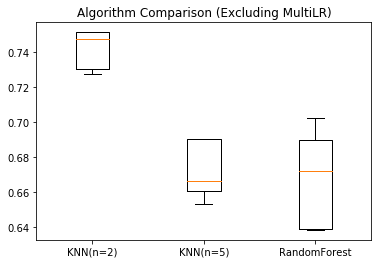

In [190]:
# Compare Algorithms
pyplot.boxplot(results, labels=names, showfliers=False)
pyplot.title('Algorithm Comparison (Excluding MultiLR)')
pyplot.show()

## Predictions and Validation

==================== MultiLR ====================


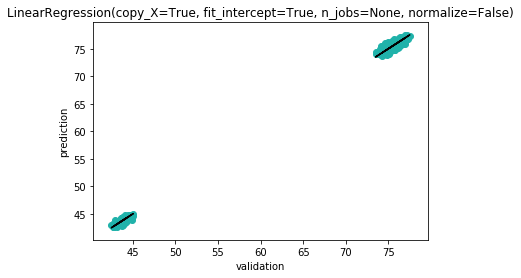

Metric			Curr Score		Prev Score
----------		---------		--------
mean_absolute_error	0.19674183511643076	0.19674183511643076
mean_squared_error	0.07226333649208268	0.07226333649208268
r2_score		0.6142502578717733	0.6142502578717733


==================== KNN(n=2) ====================


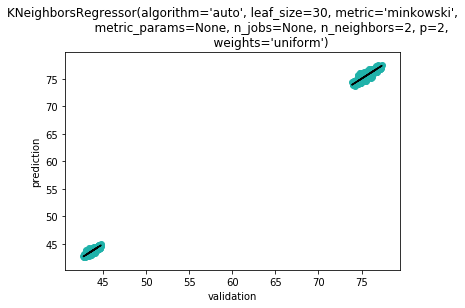

Metric			Curr Score		Prev Score
----------		---------		--------
mean_absolute_error	0.11957846633492807	0.11957846633492807
mean_squared_error	0.03526601556502983	0.03526601556502983
r2_score		0.8133520532762613	0.8133520532762613


==================== KNN(n=5) ====================


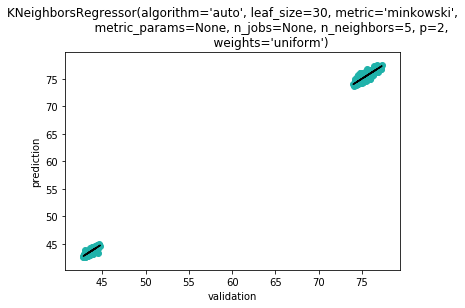

Metric			Curr Score		Prev Score
----------		---------		--------
mean_absolute_error	0.14330295665249207	0.14330295665249207
mean_squared_error	0.044604896435748366	0.044604896435748366
r2_score		0.7642362257166654	0.7642362257166654


==================== RandomForest ====================


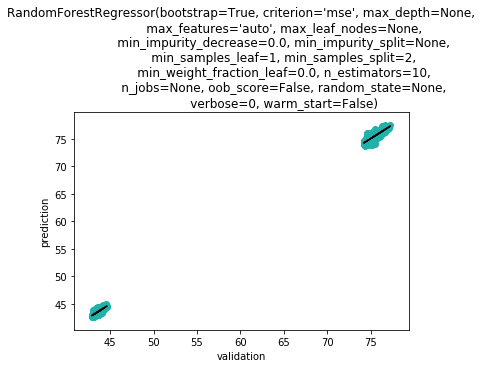

Metric			Curr Score		Prev Score
----------		---------		--------
mean_absolute_error	0.16452826559497782	0.16827641569109317
mean_squared_error	0.0565626303784906	0.05847055106167368
r2_score		0.7189375774195312	0.7149617392300929
Saving model...




In [191]:
for name, model in models:
    print(f'==================== {name} ====================') 
    
    # Make predictions on validation dataset
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # Evaluate current model
    #currMaxError=max_error(Y_validation, predictions)
    currAbsError=mean_absolute_error(Y_validation, predictions)
    currMeanSqrError=mean_squared_error(Y_validation, predictions)
    currR2score=r2_score(Y_validation, predictions)
    
    # Abs values
    x_abs=[]
    y_abs=[]
    for i in range(len(Y_validation)):
        y_abs.append(abs(Y_validation[i]))
        x_abs.append(abs(predictions[i]))
    
    pyplot.plot(x_abs, x_abs, color='black')
    pyplot.scatter(x_abs, y_abs, marker='o', color='lightseagreen');
    pyplot.title(f'{model}')
    pyplot.xlabel("validation")
    pyplot.ylabel("prediction")
    pyplot.show()    

    # Load previous model and make predictions on validation dataset
    previousModel=joblib.load(f'../models/LES_Band_Position_Model_{name}_Full_LatLon')  
    previousModel.fit(X_train, Y_train)
    prevPredictions=previousModel.predict(X_validation)
    
    # Evaluate previous model
    #prevMaxError=max_error(Y_validation, prevPredictions)
    prevAbsError=mean_absolute_error(Y_validation, prevPredictions)
    prevMeanSqrError=mean_squared_error(Y_validation, prevPredictions)
    prevR2score=r2_score(Y_validation, prevPredictions)
    
    print('Metric\t\t\tCurr Score\t\tPrev Score')
    print('----------\t\t---------\t\t--------')
    #print(f'max_error\t\t{currMaxError}\t{prevMaxError}')
    print(f'mean_absolute_error\t{currAbsError}\t{prevAbsError}')
    print(f'mean_squared_error\t{currMeanSqrError}\t{prevMeanSqrError}')
    print(f'r2_score\t\t{currR2score}\t{prevR2score}')
    
    # Save model if r^2 better
    if currR2score > prevR2score:
        print('Saving model...')
        joblib.dump(model, f'../models/LES_Band_Position_Model_{name}_Full_LatLon') 
    print('\n')

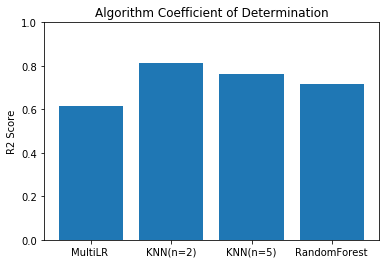

In [192]:
pyplot.title(f'Algorithm Coefficient of Determination')
pyplot.ylabel("R2 Score")  
langs = ['MultiLR ', 'KNN(n=2)', 'KNN(n=5)', 'RandomForest',]
students = [0.6142502578717733, 0.8133520532762613, 0.7642362257166654, 0.7189375774195312]
pyplot.bar(langs,students)
pyplot.ylim(0.0, 1.0)
pyplot.show()